In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#pip install pandas-datareader

In [3]:
from pandas_datareader import data

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [9]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-21,80.222504,78.967499,79.665001,79.212502,102688800.0,78.682327
2020-05-22,79.807503,78.837502,78.942497,79.722504,81803200.0,79.188927
2020-05-26,81.059998,79.125000,80.875000,79.182503,125522000.0,78.652542
2020-05-27,79.677498,78.272499,79.035004,79.527496,112945200.0,78.995224
2020-05-28,80.860001,78.907501,79.192497,79.562500,133560800.0,79.029984
...,...,...,...,...,...,...
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,126.269997
2021-05-18,126.989998,124.779999,126.559998,124.849998,63342900.0,124.849998
2021-05-19,124.919998,122.860001,123.160004,124.690002,92612000.0,124.690002


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,118.355415,115.289950,116.931394,116.849249,1.274200e+08,116.423061
std,15.880357,15.498153,15.823144,15.659308,5.273157e+07,15.763739
min,79.677498,78.272499,78.942497,79.182503,4.669130e+07,78.652542
25%,112.860001,109.160004,111.620003,111.199997,8.994600e+07,110.654892
50%,121.989998,118.919998,120.360001,120.589996,1.124244e+08,120.287437
75%,129.720001,126.760002,128.500000,127.900002,1.531980e+08,127.683121
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [11]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-21,1415.489990,1393.449951,1408.000000,1402.800049,1385000,1402.800049
2020-05-22,1412.760010,1391.829956,1396.709961,1410.420044,1309400,1410.420044
2020-05-26,1441.000000,1412.130005,1437.270020,1417.020020,2060600,1417.020020
2020-05-27,1421.739990,1391.290039,1417.250000,1417.839966,1685800,1417.839966
2020-05-28,1440.839966,1396.000000,1396.859985,1416.729980,1692200,1416.729980


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-05-21 to 2021-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

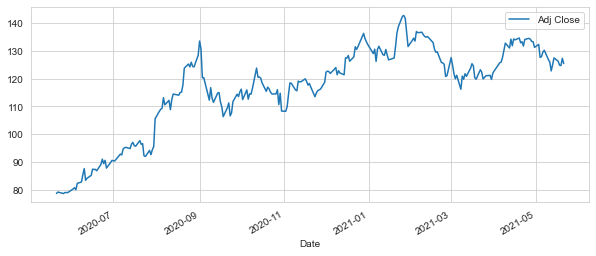

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

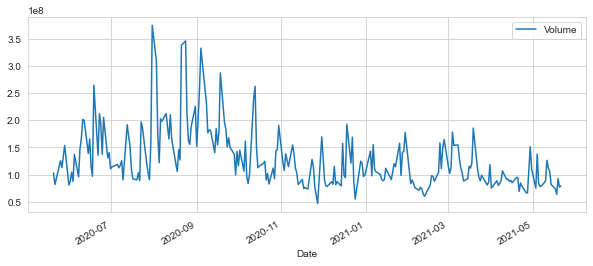

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [15]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    #AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
    #AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

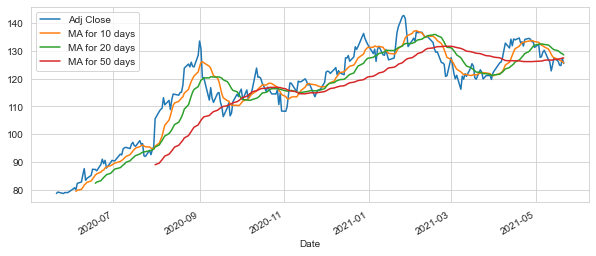

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

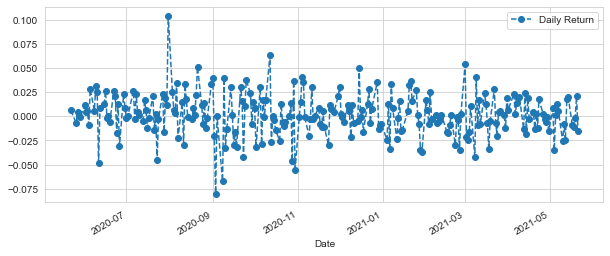

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

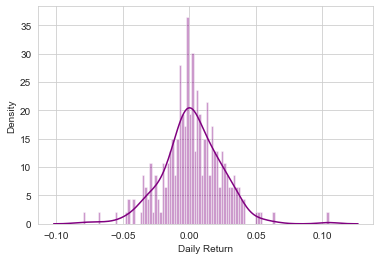

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

<AxesSubplot:>

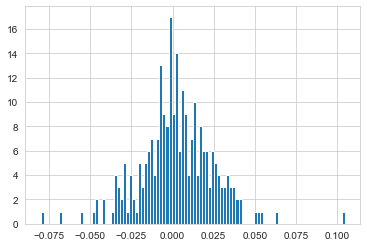

In [19]:
AAPL['Daily Return'].hist(bins=100)

In [20]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [21]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-21,78.682327,1402.800049,181.670944,2446.739990
2020-05-22,79.188927,1410.420044,181.750183,2436.879883
2020-05-26,78.652542,1417.020020,179.828796,2421.860107
2020-05-27,78.995224,1417.839966,180.066498,2410.389893
2020-05-28,79.029984,1416.729980,179.660416,2401.100098


In [22]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-21,NaN,NaN,NaN,NaN
2020-05-22,0.006439,0.005432,0.000436,-0.004030
2020-05-26,-0.006773,0.004679,-0.010572,-0.006164
2020-05-27,0.004357,0.000579,0.001322,-0.004736
2020-05-28,0.000440,-0.000783,-0.002255,-0.003854


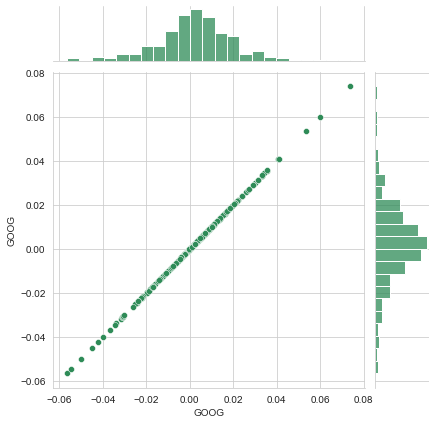

In [24]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind= 'scatter',color='seagreen')

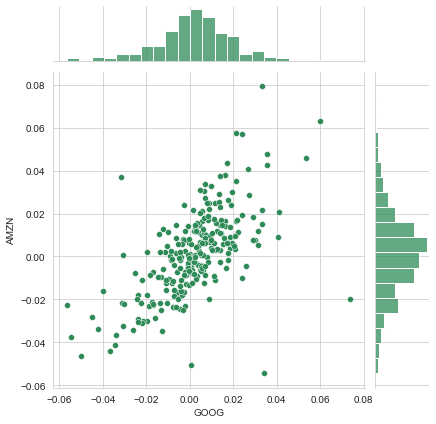

In [25]:
sns.jointplot(x='GOOG',y='AMZN',data=tech_rets,kind = 'scatter',color='seagreen')

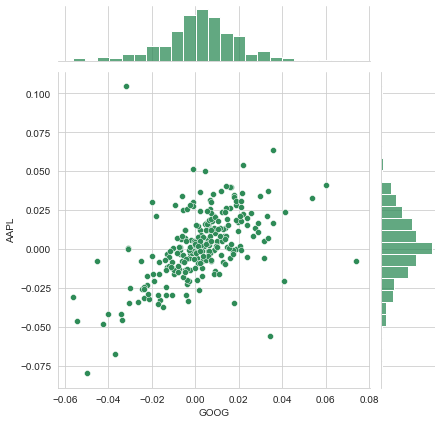

In [26]:
sns.jointplot(x='GOOG',y='AAPL',data=tech_rets,kind = 'scatter',color='seagreen')

In [27]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-21,NaN,NaN,NaN,NaN
2020-05-22,0.006439,0.005432,0.000436,-0.004030
2020-05-26,-0.006773,0.004679,-0.010572,-0.006164
2020-05-27,0.004357,0.000579,0.001322,-0.004736
2020-05-28,0.000440,-0.000783,-0.002255,-0.003854


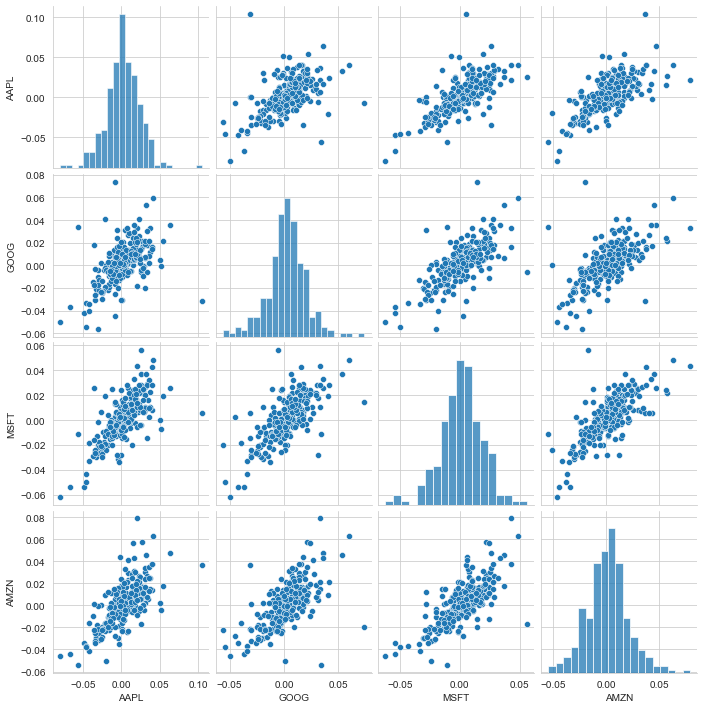

In [28]:
sns.pairplot(tech_rets.dropna())

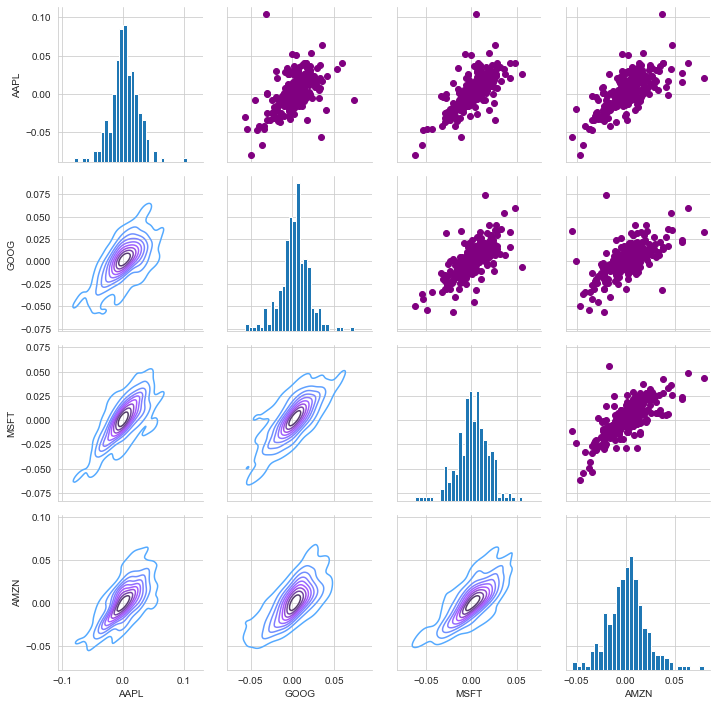

In [29]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

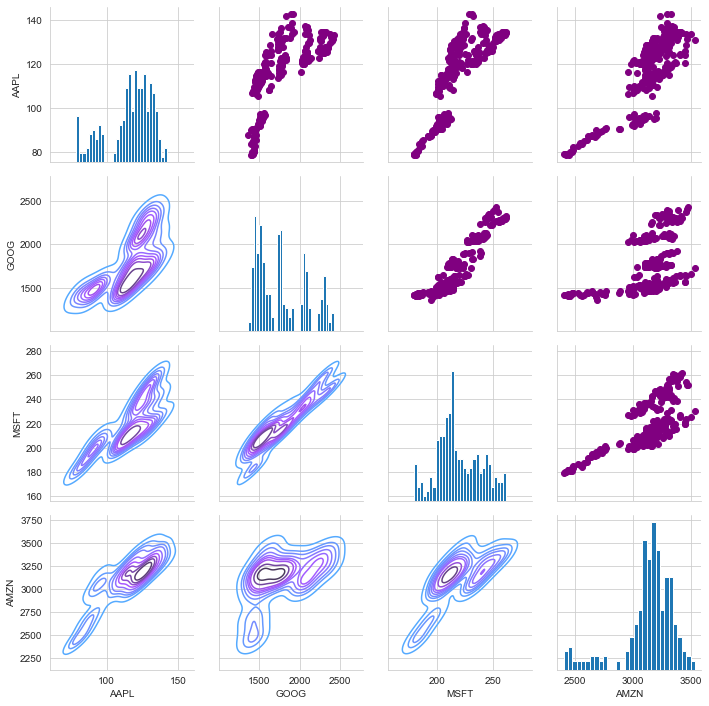

In [30]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [31]:
#sns.corrplot(tech_rets.dropna(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

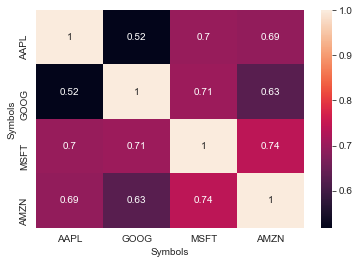

In [32]:
corrMatrix = tech_rets.corr()
sns.heatmap(corrMatrix.dropna(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

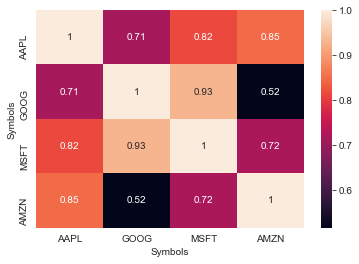

In [33]:
corrMatrix1 = closing_df.corr()
sns.heatmap(corrMatrix1.dropna(),annot=True)

risk analisis

In [34]:
rets = tech_rets.dropna()

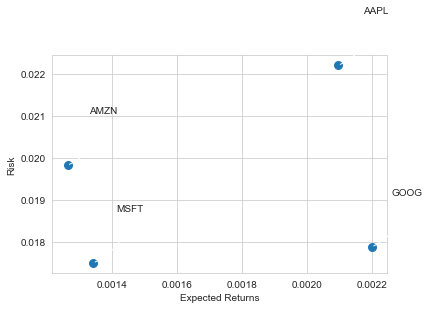

In [35]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label ,x,y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = 'offset points',ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Value at risk

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

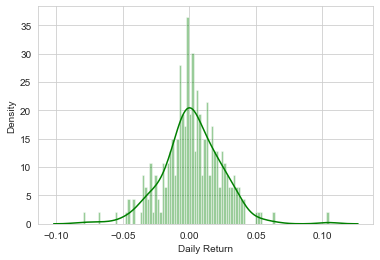

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

In [37]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-22,0.006439,0.005432,0.000436,-0.004030
2020-05-26,-0.006773,0.004679,-0.010572,-0.006164
2020-05-27,0.004357,0.000579,0.001322,-0.004736
2020-05-28,0.000440,-0.000783,-0.002255,-0.003854
2020-05-29,-0.000974,0.008604,0.010199,0.017188


In [38]:
rets['AAPL'].quantile(0.05)

-0.033771152996743756

In [39]:
 days = 365
    
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']
    

In [40]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price= np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [41]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-21,1415.489990,1393.449951,1408.000000,1402.800049,1385000,1402.800049
2020-05-22,1412.760010,1391.829956,1396.709961,1410.420044,1309400,1410.420044
2020-05-26,1441.000000,1412.130005,1437.270020,1417.020020,2060600,1417.020020
2020-05-27,1421.739990,1391.290039,1417.250000,1417.839966,1685800,1417.839966
2020-05-28,1440.839966,1396.000000,1396.859985,1416.729980,1692200,1416.729980


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

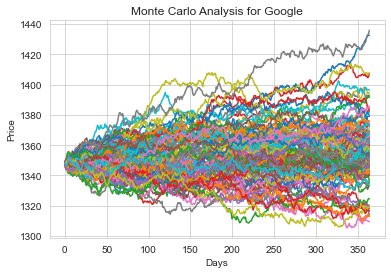

In [42]:
start_price = 1347.859985

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [ ]:
runs = 10000

simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [ ]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8, s = "Start Price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price : $%.2f" % simulations.mean())

plt.figtext(0.6,0.6, "VAR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth = 4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days,weight='bold');